# Table of Contents
- Introduction
    - Background:
     - Questions Aim to Solve:
     - Data Handling Process
         - Import Required Library: 
             - Data Analysis & Preparing:
             - Visualization Packages:
             - Machine Learning Packages:
         - Read Data From Files:
         - Data Cleaning & Analysis:
             - Feature Encoding:
             - Feature Imputation:
                 - Feature: race
                 - Feature: diag_1 diag_2 diag_3
                 - Feature: weight & payer_code & medical_specialty
             - Feature Introspection:
             - Feature Scaling & Normalization: 
             - Feature Sampling:
             - Feature Selection:
                 - Feature Quality Introspection
                 - Variance Threshold 
                 - Univariate Feature Selection
                 - Tree-based Feature Selection
                 - Selected Features Introspection
      - Modelling Process
           - Divide Training & Testing Set: 
           - Training & Validation:
               - Training & Validation:
                   - Single Classifer: Logistic Classifer
                       - Feature Selection: Backward Sequential Selection
                       - Training & Validation 
                       - Parameters Study: max_iter
      - Evaluation
      - Reference

# Introduction

- Name: Yuxiang Yao
- UCD No. 17205995
- IDE: Jupyter Notebook
- Project Structure:
    - *Machine Learning Project.ipynb*
    - *diabetic_data.csv*
- Packeage Required:
    - pandas
    - numpy
    - random
    - matplotlib
    - mpl_toolkits
    - seaborn
    - sklearn

## Background

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. An instance corresponds to an admittance of a patient. I will predict whether a patient is readmitted in 'less than 30 days', 'more than 30 days' or no readmission at all.

## Questions Aim to Solve

- Imputation based on  interacting features and/or distribution of data within feature
- Two or more ensembles tried. Graphs showing how results differ by changing composition of ensembles or voting methods shown.
- Differences of results due to hyperparameters analysed with graphs.
- Analysis of how training/validation/testing splits affect results.
- Evaluation metrics for all models compared and best model(s) identified

# Data Handling Process

## Import Required Library

Here we need import some related packages to fulfill our aims, we can divide them in to many types for their purposes:

### Data Analysis & Preparing 

In [49]:
import pandas as pd
import numpy as np
import random as rnd
import warnings
import os
from collections import Counter
print(os.listdir())
warnings.filterwarnings("ignore")

['.git', '.ipynb_checkpoints', '19062018_dataset_cleaned.csv', '20062018_cleanest_dataset_v1_no_recoding.csv', '20062018_cleanest_dataset_v2_with_recoding.csv', 'Data_Cleaning_and_Decision_Trees_with_recoding_WORKING.ipynb', 'Demo 1.ipynb', 'diabetic_data.csv', 'IDs_mapping.csv', 'Machine Learning Project.ipynb', 'online-shopper-s-intention.ipynb', 'Online_Shoppers_Intention_Prediction.ipynb', 'Student-Rubric for ML Project Evaluation.pdf', '（备份）Diabetes 130-US hospitals (DIAB).pdf']


### Visualization Packages

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

### Machine Learning Packages

In [55]:
## imputation
from sklearn.impute import SimpleImputer

## scaler method
from sklearn import preprocessing

## feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

## dataset split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.model_selection import GridSearchCV

## classifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

##evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.metrics import roc_auc_score, accuracy_score


## Read Data From Files

First, we read the relevant data from the file and store it in the dataframe, which we named *df*

In [4]:
missing_values = ["na", '?']
df = pd.read_csv("diabetic_data.csv", na_values = missing_values, low_memory=False)

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


First of all, let's comprehend the data types of each column and the missing values in each feature to prepare for our subsequent processing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Data Cleaning & Analysis

Next, let's look at the specific number of missing values for each feature:

In [7]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

We notice that in the above information about datasets, there are some NaN values in *race*, *weight*, *payer_code*, *medical_specialty* , *diag_1*， *diag_2*， *diag_3*. But we cannot sure will there be any irregular values, so more inspection is needed.

### Feature Encoding

The purpose of feature encoding is to represent the categorical feature with numbers to facilitate subsequent calculation.

In [8]:
encode_table = {
    'race':{'Caucasian': 1, 'AfricanAmerican': 2, 'Other': 0, 'Asian': 3, 'Hispanic': 4},
    'gender':{'Female': 0, 'Male': 1, 'Unknown/Invalid': -1},
    'age':{
        '[0-10)': 5,
        '[10-20)': 15,
        '[20-30)': 25,
        '[30-40)': 35,
        '[40-50)': 45,
        '[50-60)': 55,
        '[60-70)': 65,
        '[70-80)': 75,
        '[80-90)': 85,
        '[90-100)': 95,
    },
    'max_glu_serum': {'None': -99, '>200': 1, '>300':1 ,'Norm':0},
    'A1Cresult':{'None': -99 , '>7':1 ,'>8':1, 'Norm':0},
    
    'metformin':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'repaglinide': {'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'nateglinide':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'chlorpropamide':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'glimepiride':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'acetohexamide':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'glipizide': {'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'glyburide':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'tolbutamide':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'pioglitazone':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'rosiglitazone':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'acarbose':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'miglitol':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'troglitazone':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'tolazamide':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'examide':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'citoglipton':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'insulin':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'glyburide-metformin':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'glipizide-metformin':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'glimepiride-pioglitazone':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'metformin-rosiglitazone':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    'metformin-pioglitazone':{'No': -99, 'Steady': 0, 'Up': 1, 'Down': -1},
    
    'change':{'Ch': 1, 'No': 0 },
    'diabetesMed': {'Yes': 1, 'No': 0},
    'readmitted': {'NO': 0, '<30': 1, '>30':2}
    
}
df.replace(encode_table, inplace=True)

At the same time, we notice that regarding to the features *diag_ 1*, *diag_ 2* and *diag_ 3*, they represent the number of idc9 (reference:https://en.wikipedia.org/wiki/List_of_ICD-9_codes ) According to the information found (reference: https://www.researchgate.net/publication/262114048_Impact_of_HbA1c_Measurement_on_Hospital_Readmission_Rates_Analysis_of_70000_Clinical_Database_Patient_Records ). We need to classify the codes as follows:

- 1(Circulatory): 390–459, 785
- 2(Respiratory): 460–519, 786
- 3(Digestive): 520–579, 787
- 4(Diabetes): 250.xx
- 5(Injury): 800–999
- 6(Musculoskeletal)：710–739
- 7(Genitourinary)：580–629, 788
- 8(Neoplasms)：140–239, 
- 9(Other)：290–319, E–V, 280–289, 320–359, 630–679, 360–389, 740–759, 780, 781, 784, 790–799, 240–279, without 250, 680–709, 782, 001–139

Next, we perform the above processing:

In [9]:
df['diag_1'].fillna('?', inplace=True)
df['diag_2'].fillna('?', inplace=True)
df['diag_3'].fillna('?', inplace=True)

In [10]:
df['level_diag1'] = df['diag_1']
df.loc[df['diag_1'].str.contains('V'), ['level_diag1']] = 9
df.loc[df['diag_1'].str.contains('E'), ['level_diag1']] = 9
df['level_diag1'].replace('?', -1, inplace=True)  
df['level_diag1'] = pd.to_numeric(df['level_diag1'])

for index, row in df.iterrows():
    if (row['level_diag1'] == -1):
        pass
    elif (row['level_diag1'] >= 390 and row['level_diag1'] < 460) or (np.floor(row['level_diag1']) == 785):
        df.loc[index, 'level_diag1'] = 1
    elif (row['level_diag1'] >= 460 and row['level_diag1'] < 520) or (np.floor(row['level_diag1']) == 786):
        df.loc[index, 'level_diag1'] = 2
    elif (row['level_diag1'] >= 520 and row['level_diag1'] < 580) or (np.floor(row['level_diag1']) == 787):
        df.loc[index, 'level_diag1'] = 3
    elif (np.floor(row['level_diag1']) == 250):
        df.loc[index, 'level_diag1'] = 4
    elif (row['level_diag1'] >= 800 and row['level_diag1'] < 1000):
        df.loc[index, 'level_diag1'] = 5
    elif (row['level_diag1'] >= 710 and row['level_diag1'] < 740):
        df.loc[index, 'level_diag1'] = 6
    elif (row['level_diag1'] >= 580 and row['level_diag1'] < 630) or (np.floor(row['level_diag1']) == 788):
        df.loc[index, 'level_diag1'] = 7
    elif (row['level_diag1'] >= 140 and row['level_diag1'] < 240):
        df.loc[index, 'level_diag1'] = 8
    else:
        df.loc[index, 'level_diag1'] = 9


df['level_diag2'] = df['diag_2']
df.loc[df['diag_2'].str.contains('V'), ['level_diag2']] = 9
df.loc[df['diag_2'].str.contains('E'), ['level_diag2']] = 9
df['level_diag2'].replace('?', -1, inplace=True)

df['level_diag2'] = pd.to_numeric(df['level_diag2'])
for index, row in df.iterrows():
    if (row['level_diag2'] == -1):
        pass
    elif (row['level_diag2'] >= 390 and row['level_diag2'] < 460) or (np.floor(row['level_diag2']) == 785):
        df.loc[index, 'level_diag2'] = 1
    elif (row['level_diag2'] >= 460 and row['level_diag2'] < 520) or (np.floor(row['level_diag2']) == 786):
        df.loc[index, 'level_diag2'] = 2
    elif (row['level_diag2'] >= 520 and row['level_diag2'] < 580) or (np.floor(row['level_diag2']) == 787):
        df.loc[index, 'level_diag2'] = 3
    elif (np.floor(row['level_diag2']) == 250):
        df.loc[index, 'level_diag2'] = 4
    elif (row['level_diag2'] >= 800 and row['level_diag2'] < 1000):
        df.loc[index, 'level_diag2'] = 5
    elif (row['level_diag2'] >= 710 and row['level_diag2'] < 740):
        df.loc[index, 'level_diag2'] = 6
    elif (row['level_diag2'] >= 580 and row['level_diag2'] < 630) or (np.floor(row['level_diag2']) == 788):
        df.loc[index, 'level_diag2'] = 7
    elif (row['level_diag2'] >= 140 and row['level_diag2'] < 240):
        df.loc[index, 'level_diag2'] = 8
    else:
        df.loc[index, 'level_diag2'] = 9



df['level_diag3'] = df['diag_3']

df.loc[df['diag_3'].str.contains('V'), ['level_diag3']] = 9
df.loc[df['diag_3'].str.contains('E'), ['level_diag3']] = 9
df['level_diag3'].replace('?', -1, inplace=True)

df['level_diag3'] = pd.to_numeric(df['level_diag3'])
for index, row in df.iterrows():
    if (row['level_diag3'] == -1):
        pass
    elif (row['level_diag3'] >= 390 and row['level_diag3'] < 460) or (np.floor(row['level_diag3']) == 785):
        df.loc[index, 'level_diag3'] = 1
    elif (row['level_diag3'] >= 460 and row['level_diag3'] < 520) or (np.floor(row['level_diag3']) == 786):
        df.loc[index, 'level_diag3'] = 2
    elif (row['level_diag3'] >= 520 and row['level_diag3'] < 580) or (np.floor(row['level_diag3']) == 787):
        df.loc[index, 'level_diag3'] = 3
    elif (np.floor(row['level_diag3']) == 250):
        df.loc[index, 'level_diag3'] = 4
    elif (row['level_diag3'] >= 800 and row['level_diag3'] < 1000):
        df.loc[index, 'level_diag3'] = 5
    elif (row['level_diag3'] >= 710 and row['level_diag3'] < 740):
        df.loc[index, 'level_diag3'] = 6
    elif (row['level_diag3'] >= 580 and row['level_diag3'] < 630) or (np.floor(row['level_diag3']) == 788):
        df.loc[index, 'level_diag3'] = 7
    elif (row['level_diag3'] >= 140 and row['level_diag3'] < 240):
        df.loc[index, 'level_diag3'] = 8
    else:
        df.loc[index, 'level_diag3'] = 9

df.drop(['diag_1','diag_2','diag_3'],inplace=True, axis=1)

Now let'e see what features are like after imputation:

In [11]:
print(Counter(df['level_diag1'].tolist()))
print(Counter(df['level_diag2'].tolist()))
print(Counter(df['level_diag3'].tolist()))

Counter({1.0: 30437, 9.0: 18172, 2.0: 14423, 3.0: 9475, 4.0: 8757, 5.0: 6974, 7.0: 5117, 6.0: 4957, 8.0: 3433, -1.0: 21})
Counter({1.0: 31881, 9.0: 26553, 4.0: 12794, 2.0: 10895, 7.0: 8376, 3.0: 4170, 8.0: 2547, 5.0: 2428, 6.0: 1764, -1.0: 358})
Counter({1.0: 30306, 9.0: 29195, 4.0: 17157, 2.0: 7358, 7.0: 6680, 3.0: 3930, 5.0: 1946, 6.0: 1915, 8.0: 1856, -1.0: 1423})


Here, we can have a preliminary understanding of the data and the relationship between features in the data：

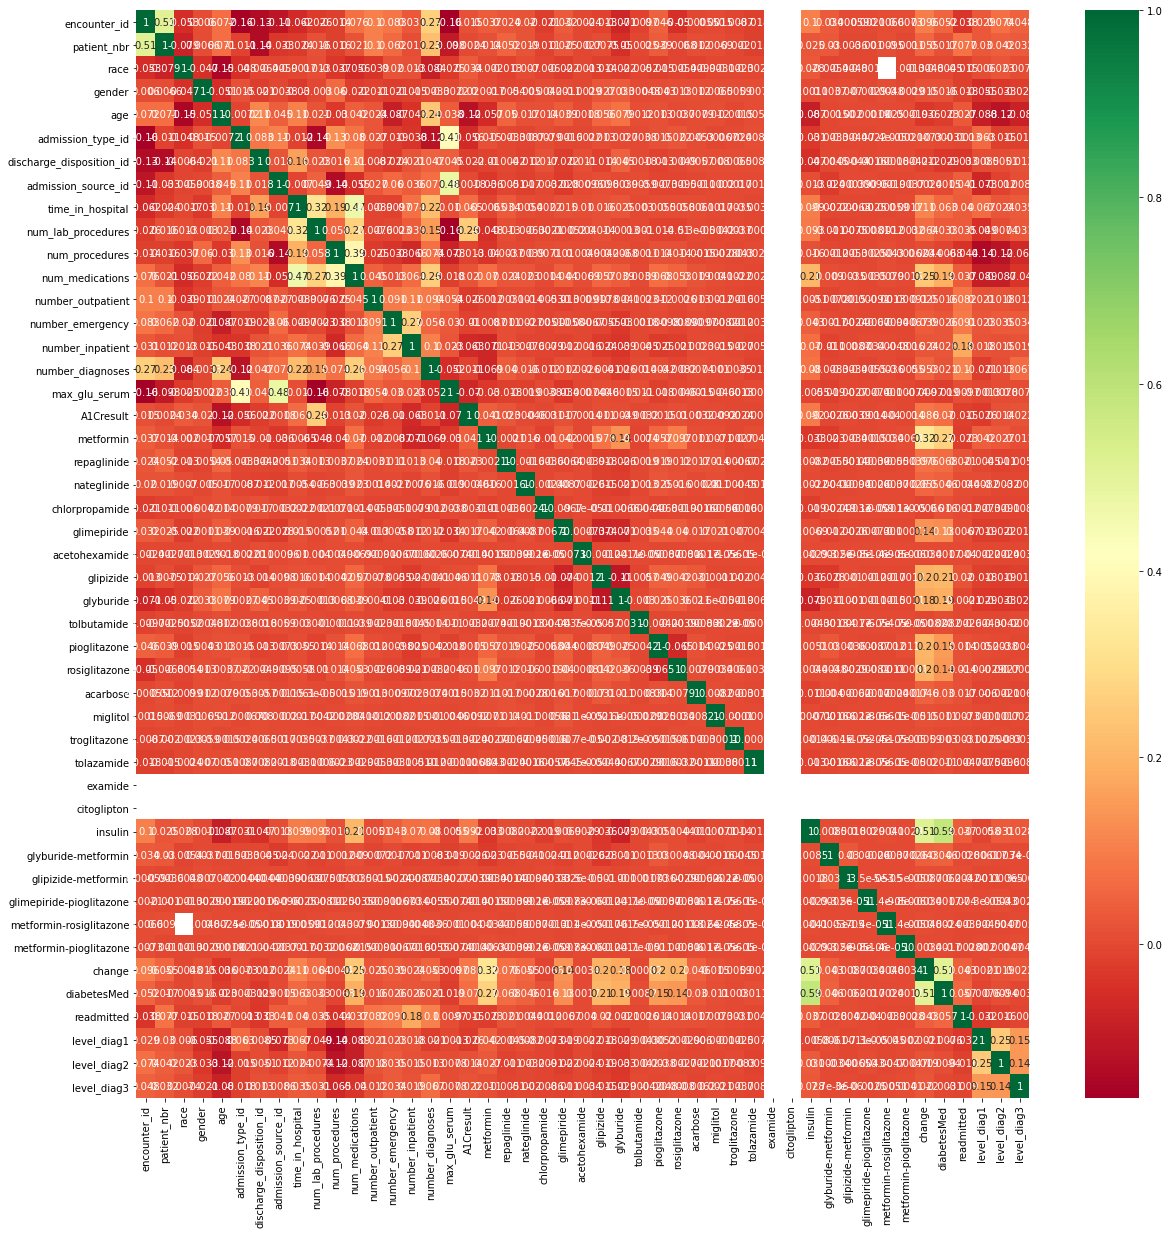

In [12]:
combine = pd.concat([df], axis=1)
corr_mat = combine.corr()

plt.figure(figsize=(20,20))
g=sns.heatmap(corr_mat,annot=True,cmap="RdYlGn")

From the red area in the above Heatmap, we can draw a preliminary conclusion: most features have no strong correlation within each other. Before the prediction process, we need to process the data in a variety of ways.

### Feature Imputation

As we discussed earlier, for missing values, we need to fill in the missing values for subsequent processing methods. Generally speaking, there are several methods as follows:

- **Delete tuple**: that is to delete the object (tuple, record) with missing information attribute value, so as to get a complete information table
- **Special value padding**: treats null as a special property value, which is different from any other attribute value
- **Average filling**: the attributes in the initial dataset are divided into numerical attributes and non numerical attributes for processing

What we notice here is that for the three methods mentioned above, we realize that artificial noise is added when filling the missing values in the above way. We need to explore more reliable methods:

#### Feature: race

We know thate the feature "Race" is **Nominal** value, and values should be one of them: *Caucasian*, *Asian*, *AfricanAmerican*, *Hispanic*, and *other*. Let's make one prelimenary understanding of it:

Text(0.5, 1.0, 'race')

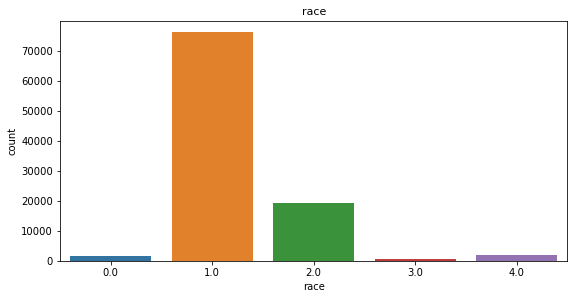

In [13]:
plt.rcParams['figure.figsize'] = (20, 15)
plt.subplot(3, 2, 1)
sns.countplot(df['race'])
plt.title('race', fontsize = 11)

Here we intend to use **algorithmic fitting** to fill in. Specifically, this method is to establish regression equations based on the complete data set. For objects with null values, the known attribute values are substituted into the equation to estimate the unknown attribute values, and the estimated values are filled in. Here we use **random forests** to implement the relevant functions.

In [14]:
def set_missing_race_value(df_input):
    process_df = df_input[['race', 'gender', 'age', 
                           'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                           'time_in_hospital', 'num_lab_procedures', 'num_procedures',
                           'num_medications', 'number_outpatient', 'number_emergency', 
                           'number_inpatient', 'number_diagnoses', 'max_glu_serum',
                            'A1Cresult', 'change', 'diabetesMed']]
    
    known = process_df[process_df.race.notnull()].values
    unknown = process_df[process_df.race.isnull()].values
    
    X = known[:,1:]
    y = known[:,0]
    
    rfr = RandomForestRegressor(random_state = 0, n_estimators = 200, n_jobs = -1)
    rfr.fit(X,y)
    
    predicted = rfr.predict(unknown[:,1::])
    df_input.loc[(df_input.race.isnull()), 'race'] = predicted
    
    
    return df_input

In [15]:
df = set_missing_race_value(df)
df['race'] = df['race'].map(lambda x: int(x))

We printed the optional value to test the imputation is done already.

In [16]:
print(Counter(df['race'].tolist()))

Counter({1: 78321, 2: 19222, 4: 2037, 0: 1545, 3: 641})


#### Feature: *diag_1* *diag_2* *diag_3*

Here we use the above method to fill in the blank. First we should replace *-1* to *NaN* value

In [21]:
df['level_diag1'].replace(-1.0, np.nan,inplace = True)
df['level_diag2'].replace(-1.0, np.nan,inplace = True)
df['level_diag3'].replace(-1.0, np.nan,inplace = True)

We have a basic understanding of the distribution of data by followin images:

Text(0.5, 1.0, 'level_diag3')

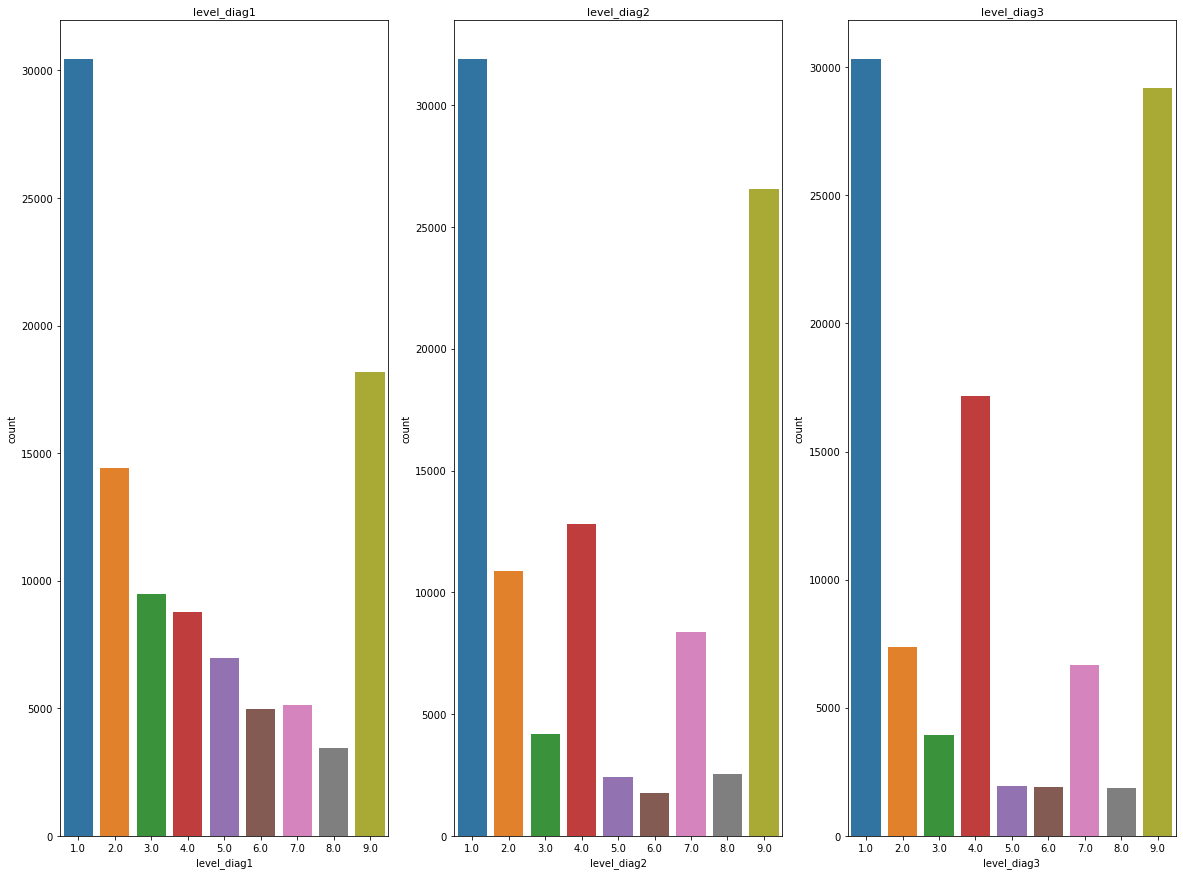

In [22]:
plt.subplot(1, 3, 1)
sns.countplot(df['level_diag1'])
plt.title('level_diag1', fontsize = 11)

plt.subplot(1, 3, 2)
sns.countplot(df["level_diag2"])
plt.title('level_diag2', fontsize = 11)

plt.subplot(1, 3, 3)
sns.countplot(df['level_diag3'])
plt.title('level_diag3', fontsize = 11)

Here, we use the above method to perform the imputation:

In [25]:
def set_missing_diag1_value(df_input):
    process_df = df_input[['level_diag1', 'gender', 'age', 
                           'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                           'time_in_hospital', 'num_lab_procedures', 'num_procedures',
                           'num_medications', 'number_outpatient', 'number_emergency', 
                           'number_inpatient', 'number_diagnoses', 'max_glu_serum',
                            'A1Cresult', 'change', 'diabetesMed']]
    
    known = process_df[process_df.level_diag1.notnull()].values
    unknown = process_df[process_df.level_diag1.isnull()].values
    
    X = known[:,1:]
    y = known[:,0]
    
    rfr = RandomForestRegressor(random_state = 0, n_estimators = 200, n_jobs = -1)
    rfr.fit(X,y)
    
    predicted = rfr.predict(unknown[:,1::])
    df_input.loc[(df_input.level_diag1.isnull()), 'level_diag1'] = predicted
    
    
    return df_input

In [26]:
def set_missing_diag2_value(df_input):
    process_df = df_input[['level_diag2', 'gender', 'age', 
                           'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                           'time_in_hospital', 'num_lab_procedures', 'num_procedures',
                           'num_medications', 'number_outpatient', 'number_emergency', 
                           'number_inpatient', 'number_diagnoses', 'max_glu_serum',
                            'A1Cresult', 'change', 'diabetesMed']]
    
    known = process_df[process_df.level_diag2.notnull()].values
    unknown = process_df[process_df.level_diag2.isnull()].values
    
    X = known[:,1:]
    y = known[:,0]
    
    rfr = RandomForestRegressor(random_state = 0, n_estimators = 200, n_jobs = -1)
    rfr.fit(X,y)
    
    predicted = rfr.predict(unknown[:,1::])
    df_input.loc[(df_input.level_diag2.isnull()), 'level_diag2'] = predicted
    
    
    return df_input

In [27]:
def set_missing_diag3_value(df_input):
    process_df = df_input[['level_diag3', 'gender', 'age', 
                           'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                           'time_in_hospital', 'num_lab_procedures', 'num_procedures',
                           'num_medications', 'number_outpatient', 'number_emergency', 
                           'number_inpatient', 'number_diagnoses', 'max_glu_serum',
                            'A1Cresult', 'change', 'diabetesMed']]
    
    known = process_df[process_df.level_diag3.notnull()].values
    unknown = process_df[process_df.level_diag3.isnull()].values
    
    X = known[:,1:]
    y = known[:,0]
    
    rfr = RandomForestRegressor(random_state = 0, n_estimators = 200, n_jobs = -1)
    rfr.fit(X,y)
    
    predicted = rfr.predict(unknown[:,1::])
    df_input.loc[(df_input.level_diag3.isnull()), 'level_diag3'] = predicted
    
    
    return df_input

In [28]:
df = set_missing_diag1_value(df)
df = set_missing_diag2_value(df)
df = set_missing_diag3_value(df)

df['level_diag1'] = df['level_diag1'].map(lambda x: int(x))
df['level_diag2'] = df['level_diag2'].map(lambda x: int(x))
df['level_diag3'] = df['level_diag3'].map(lambda x: int(x))

Here we check the data distribution after imputation: 

In [29]:
print(Counter(df['level_diag1'].tolist()))
print(Counter(df['level_diag2'].tolist()))
print(Counter(df['level_diag3'].tolist()))

Counter({1: 30437, 9: 18172, 2: 14425, 3: 9476, 4: 8768, 5: 6981, 7: 5117, 6: 4957, 8: 3433})
Counter({1: 31881, 9: 26553, 4: 12867, 2: 10899, 7: 8417, 3: 4206, 8: 2618, 5: 2505, 6: 1820})
Counter({1: 30306, 9: 29195, 4: 17562, 2: 7366, 7: 6877, 3: 4067, 5: 2291, 6: 2161, 8: 1941})


#### Feature: weight & payer_code & medical_specialty

We notice that there are too many missing values in these three features, which account for more than half of the total data. Therefore, we think that the interpolation is no longer appropriate at this time, and the data should be dropped.

In [30]:
df.drop(['weight'],inplace=True, axis=1)
df.drop(['payer_code'],inplace=True, axis=1)
df.drop(['medical_specialty'],inplace=True, axis=1)

Now we have finished filling the missing values. Finally, we make some review:

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   encounter_id              101766 non-null  int64
 1   patient_nbr               101766 non-null  int64
 2   race                      101766 non-null  int64
 3   gender                    101766 non-null  int64
 4   age                       101766 non-null  int64
 5   admission_type_id         101766 non-null  int64
 6   discharge_disposition_id  101766 non-null  int64
 7   admission_source_id       101766 non-null  int64
 8   time_in_hospital          101766 non-null  int64
 9   num_lab_procedures        101766 non-null  int64
 10  num_procedures            101766 non-null  int64
 11  num_medications           101766 non-null  int64
 12  number_outpatient         101766 non-null  int64
 13  number_emergency          101766 non-null  int64
 14  number_inpatient    

### Feature Introspection

We print out the optional values of each feature to see if there is any regular value.

In [32]:
for index, row in df.iteritems():
    if (index != 'encounter_id' and index != 'patient_nbr'):
        print(index)
        print(Counter(df[index].tolist()))
        print('*' * 40)

race
Counter({1: 78321, 2: 19222, 4: 2037, 0: 1545, 3: 641})
****************************************
gender
Counter({0: 54708, 1: 47055, -1: 3})
****************************************
age
Counter({75: 26068, 65: 22483, 55: 17256, 85: 17197, 45: 9685, 35: 3775, 95: 2793, 25: 1657, 15: 691, 5: 161})
****************************************
admission_type_id
Counter({1: 53990, 3: 18869, 2: 18480, 6: 5291, 5: 4785, 8: 320, 7: 21, 4: 10})
****************************************
discharge_disposition_id
Counter({1: 60234, 3: 13954, 6: 12902, 18: 3691, 2: 2128, 22: 1993, 11: 1642, 5: 1184, 25: 989, 4: 815, 7: 623, 23: 412, 13: 399, 14: 372, 28: 139, 8: 108, 15: 63, 24: 48, 9: 21, 17: 14, 16: 11, 19: 8, 10: 6, 27: 5, 12: 3, 20: 2})
****************************************
admission_source_id
Counter({7: 57494, 1: 29565, 17: 6781, 4: 3187, 6: 2264, 2: 1104, 5: 855, 3: 187, 20: 161, 9: 125, 8: 16, 22: 12, 10: 8, 14: 2, 11: 2, 25: 2, 13: 1})
****************************************
time_in_ho

After introspection we have not found any irregular values.

#### Feature Introspection: *Race*

### Feature Scaling & Normalization

We have noticed that in the field of machine learning, different evaluation indexes often have different dimensions and units, which will affect the results of data analysis. In order to eliminate the dimensional influence between indicators, we need to standardize data processing to solve the comparability between data indicators. After the original data is standardized, each index is in the same order of magnitude, which is suitable for comprehensive comparative evaluation.

In short, the purpose of normalization is to limit the preprocessed data to a certain range ([0,1]), so as to eliminate the adverse effects caused by singular sample data.

Firstly, we define some normalization functions of data:

In [33]:
def regularit(df):
    newDataFrame = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        newDataFrame[c] = ((d - MIN) / (MAX - MIN)).tolist()
    return newDataFrame

Then we normalize the following features

In [34]:
temp_df_data_scaling = pd.DataFrame(df, columns = 
                                    ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                                     'num_medications', 'number_outpatient', 'number_emergency',
                                    'number_inpatient', 'number_diagnoses', 'age']
                                   )

temp_df_data_scaling_minmax = regularit(temp_df_data_scaling)

for index, row in temp_df_data_scaling_minmax.iteritems():
    df[index] = temp_df_data_scaling_minmax[index]

### Feature Sampling

In this step, we need to consider the distribution of data: is there an **imbalanced dataset** problem?
First of all, we need to understand what is **imbalanced datasets**: **imbalanced datasets** mean that the number of samples in different categories of datasets varies greatly. In the case of **dichotomous problem**, we assume that the situation which the number of positive samples is much larger than that of negative classes is called **imbalanced data**. 

In [35]:
print(Counter(df['readmitted'].tolist()))

Counter({0: 54864, 2: 35545, 1: 11357})


After research, we found that there was indeed an imbalanced problem. Since the length of dataset has reached to one hundred thousand,so the best sampling way is to **Undersampling**:

In [36]:
df_target_0 = df[df['readmitted']==0]
df_target_1 = df[df['readmitted']==1]
df_target_2 = df[df['readmitted']==2]
df_target_0 = df_target_0.sample(frac=0.2)
df_target_2 = df_target_2.sample(frac=0.33)

print('The length of target-0-dataset after sampling:')
print(len(df_target_0))
print('The length of target-1-dataset after sampling:')
print(len(df_target_1))
print('The length of target-2-dataset after sampling:')
print(len(df_target_2))

The length of target-0-dataset after sampling:
10973
The length of target-1-dataset after sampling:
11357
The length of target-2-dataset after sampling:
11730


Then we merge the sampled datasets

In [37]:
df_new = pd.concat([df_target_0,df_target_1,df_target_2])
df = df_new

## Feature Selection

In the process of machine learning, there is an influential saying: "*garbage in garage out*". Therefore, feature selection is very meaningful for the follow-up learning process. We will carry out feature selection here.

First of all, we should make some preparations:

In [38]:
temp_df_target =  pd.DataFrame(df, columns = ['readmitted'])
temp_df_data = df.drop('readmitted', axis = 1)

In [39]:
temp_df_data.drop(['encounter_id', 'patient_nbr'],inplace=True, axis=1)

### Feature Quality Introspection

Here, we want to examine the relationship between each descriptions feature and the target feature, as well as the relationship between the description features and the target features

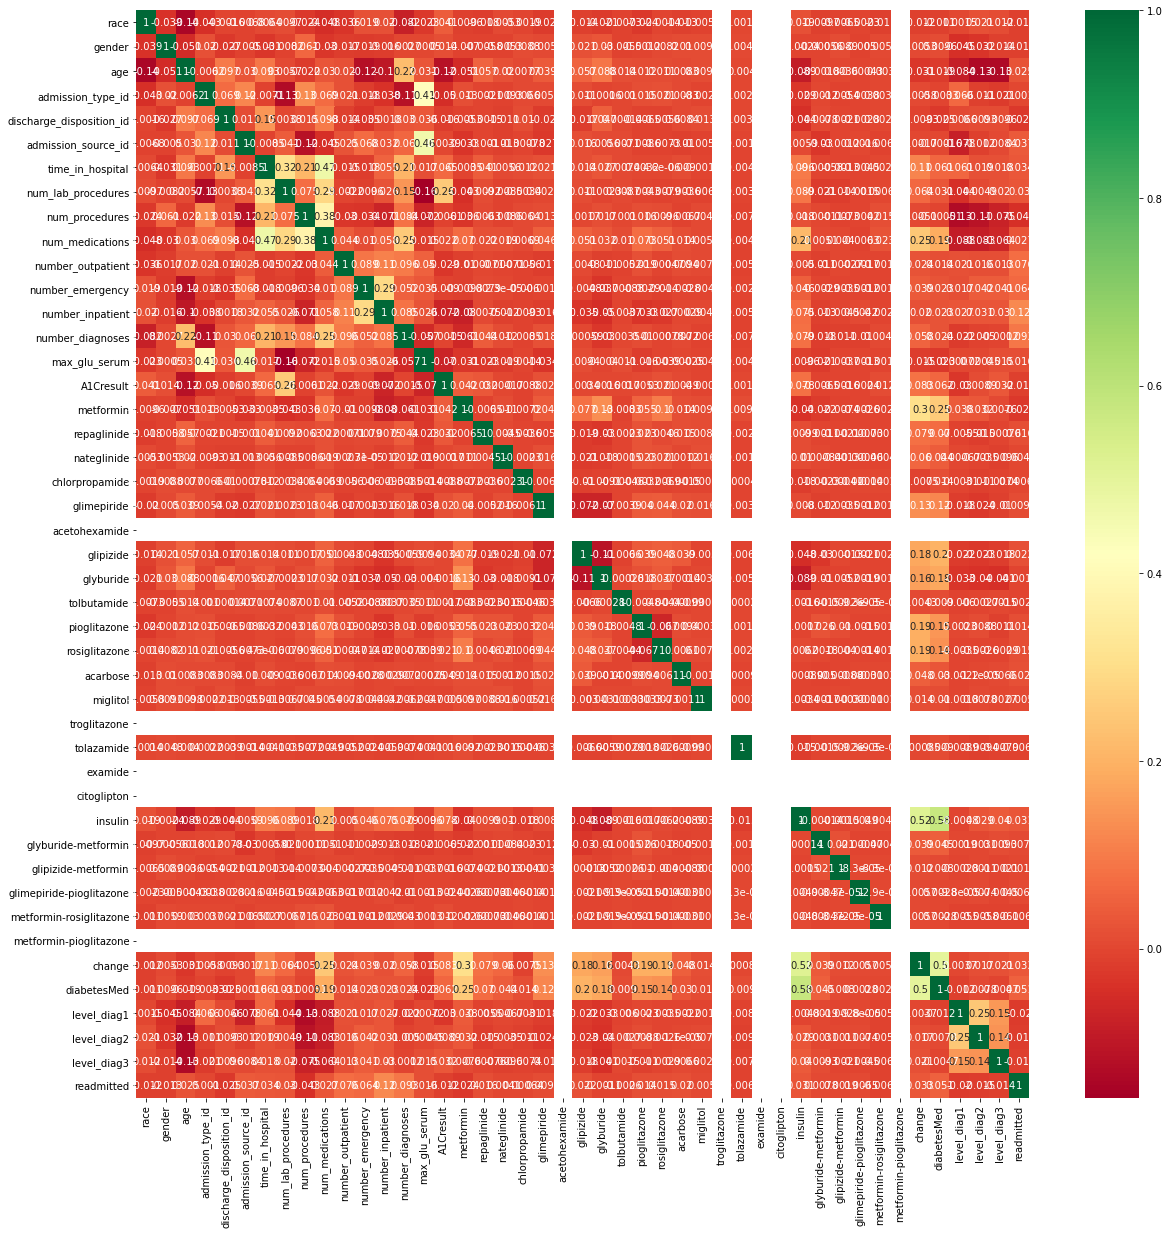

In [40]:
combine = pd.concat([temp_df_data, temp_df_target], axis=1)
corr_mat = combine.corr()

plt.figure(figsize=(20,20))
g=sns.heatmap(corr_mat,annot=True,cmap="RdYlGn")

Correlation states how the features are related to each other or the target variable. It can be either positive or negative. So the values that are closer to 1 and -1 are really good and values closer to 0 from both sides are not good. We will use a heatmap to identify correlations easily.

We can see that in the above figure, the data of each cell is scattered in [0.2, - 0.4]. We can see that the strength of the relationship between the data is not obvious, and the overall quality of the data is not excellent. 

### Variance Threshold 

Firstly, we extract features by their variance, and the features with the default variance of 0 will be deleted automatically

In [41]:
selector = VarianceThreshold(threshold= 0)
selector.fit_transform(temp_df_data)
temp_df_data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,level_diag1,level_diag2,level_diag3
11711,2,0,0.444444,1,18,7,0.076923,0.427481,0.000000,0.0875,...,-99,-99,-99,-99,-99,0,1,2,4,1
35285,2,1,0.555556,1,5,6,0.461538,0.328244,0.000000,0.2250,...,-99,-99,-99,-99,-99,0,1,1,1,6
93530,1,1,0.888889,1,3,7,0.615385,0.335878,0.000000,0.1250,...,-99,-99,-99,-99,-99,0,0,9,9,1
63900,2,0,0.777778,1,1,7,0.076923,0.335878,0.166667,0.1875,...,-99,-99,-99,-99,-99,0,1,3,3,9
63672,1,1,0.888889,5,14,1,0.307692,0.458015,0.000000,0.3125,...,-99,-99,-99,-99,-99,1,1,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66671,1,0,0.888889,2,1,7,0.230769,0.580153,0.333333,0.2500,...,-99,-99,-99,-99,-99,1,1,7,1,1
98455,1,1,0.777778,1,1,7,0.000000,0.000000,0.000000,0.2125,...,-99,-99,-99,-99,-99,1,1,2,2,1
62579,1,1,0.888889,1,3,7,0.076923,0.007634,0.000000,0.1000,...,-99,-99,-99,-99,-99,1,1,2,4,9
85920,1,1,0.777778,2,6,7,0.230769,0.473282,0.000000,0.1500,...,-99,-99,-99,-99,-99,0,1,2,4,9


### Univariate Feature Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. Here, we use chi-squared statistical test by computing the ANOVA F-value for the provided sample

In [42]:

from sklearn.feature_selection import f_classif


best_features = SelectKBest(score_func=f_classif, k=10).fit(temp_df_data, temp_df_target)
dfscores = pd.DataFrame(best_features.scores_)
dfcolumns = pd.DataFrame(temp_df_data.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
#naming the dataframe columns
featureScores.columns = ['Specs','Score']  
f_impor_feature = featureScores.nlargest(15,'Score')['Specs']
print(featureScores.nlargest(15,'Score'))

                       Specs       Score
12          number_inpatient  905.807702
13          number_diagnoses  228.225343
11          number_emergency  135.978376
4   discharge_disposition_id  117.992686
10         number_outpatient  107.155838
6           time_in_hospital   84.046741
9            num_medications   62.796491
40               diabetesMed   61.550537
33                   insulin   53.393560
8             num_procedures   33.192912
16                 metformin   30.850906
39                    change   26.104115
7         num_lab_procedures   25.054885
5        admission_source_id   23.851602
2                        age   20.178865


### Tree-based Feature Selection

Tree-based estimators (see the sklearn.tree module and forest of trees in the sklearn.ensemble module) can be used to 
compute impurity-based feature importances, which in turn can be used to discard irrelevant features.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is 
the feature towards your output variable.

We will use Extra Tree Classifier for extracting the top 15 features for the dataset.

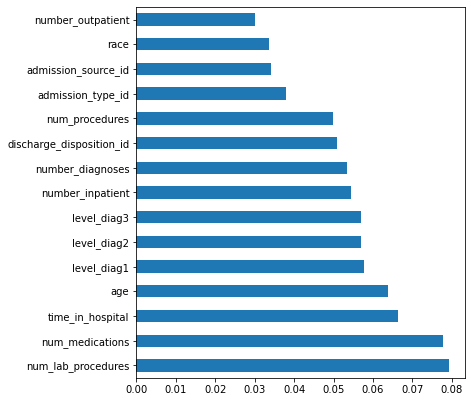

In [43]:
tree = ExtraTreesClassifier()
tree.fit(temp_df_data, temp_df_target)

df_feature_importances = pd.Series(tree.feature_importances_, index=temp_df_data.columns)
plt.subplot(2, 3, 1)
tree_impor_feature = df_feature_importances.nlargest(15)
df_feature_importances.nlargest(15).plot(kind='barh')

### Selected Features Introspection

After several selection shown as above, we choose the intersection of the two methods

In [44]:
df_data = temp_df_data
df_target = temp_df_target

selected_features = [ ]
for i, v in tree_impor_feature.items():
    if i in f_impor_feature.values:
        selected_features.append(i)

In [45]:
selected_df_data = pd.DataFrame(df_data, columns = selected_features)
selected_df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34060 entries, 11711 to 28493
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   num_lab_procedures        34060 non-null  float64
 1   num_medications           34060 non-null  float64
 2   time_in_hospital          34060 non-null  float64
 3   age                       34060 non-null  float64
 4   number_inpatient          34060 non-null  float64
 5   number_diagnoses          34060 non-null  float64
 6   discharge_disposition_id  34060 non-null  int64  
 7   num_procedures            34060 non-null  float64
 8   admission_source_id       34060 non-null  int64  
 9   number_outpatient         34060 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 2.9 MB


In [46]:
selected_df = pd.concat([selected_df_data, df_target], axis = 1)
selected_df

,num_lab_procedures,num_medications,time_in_hospital,age,number_inpatient,number_diagnoses,discharge_disposition_id,num_procedures,admission_source_id,number_outpatient,readmitted
11711,0.427481,0.0875,0.076923,0.444444,0.000000,0.200000,18,0.000000,7,0.0,0
35285,0.328244,0.2250,0.461538,0.555556,0.047619,0.266667,5,0.000000,6,0.0,0
93530,0.335878,0.1250,0.615385,0.888889,0.000000,0.533333,3,0.000000,7,0.0,0
63900,0.335878,0.1875,0.076923,0.777778,0.000000,0.333333,1,0.166667,7,0.0,0
63672,0.458015,0.3125,0.307692,0.888889,0.047619,0.533333,14,0.000000,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
66671,0.580153,0.2500,0.230769,0.888889,0.000000,0.533333,1,0.333333,7,0.0,2
98455,0.000000,0.2125,0.000000,0.777778,0.000000,0.533333,1,0.000000,7,0.0,2
62579,0.007634,0.1000,0.076923,0.888889,0.000000,0.266667,3,0.000000,7,0.0,2
85920,0.473282,0.1500,0.230769,0.777778,0.047619,0.533333,6,0.000000,7,0.0,2


Next, let's examine the relationship between each feature and the target feature:

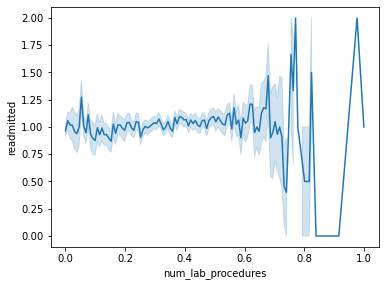

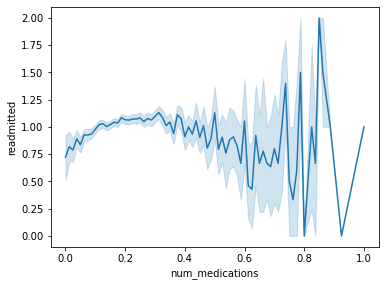

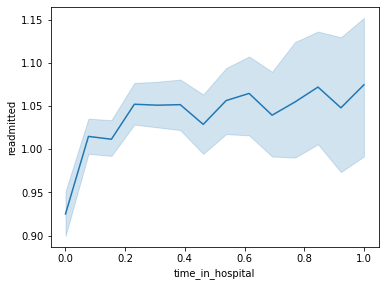

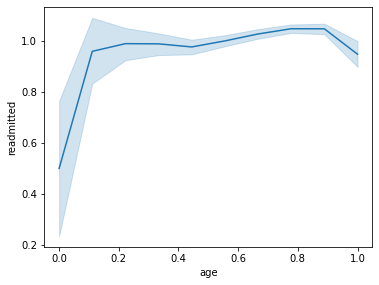

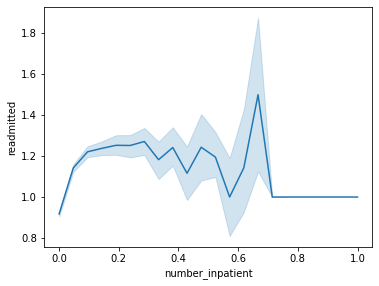

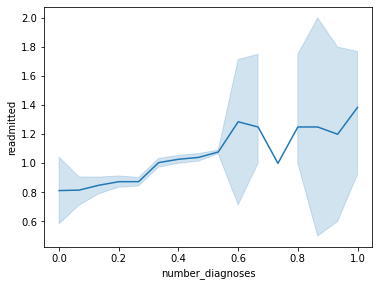

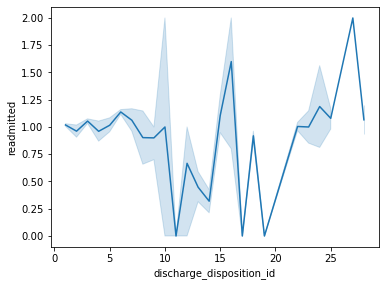

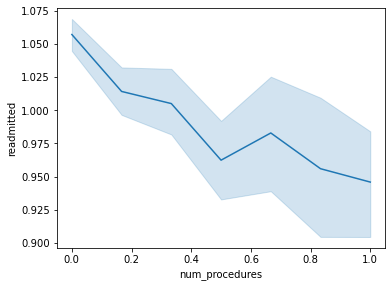

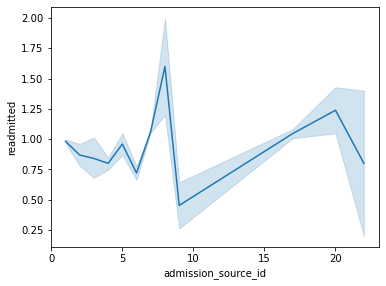

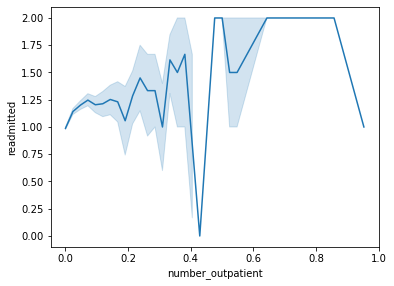

In [47]:
for item in selected_features: 
    plt.subplot(3, 3, 1)
    sns.lineplot(x=item, y='readmitted', data=selected_df)
    plt.show()

Before we start training, we will check the relevant data:

In [48]:
df_target = df_target.astype('int')
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34060 entries, 11711 to 28493
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   readmitted  34060 non-null  int32
dtypes: int32(1)
memory usage: 399.1 KB


# Modelling Process

## Single Classifer: Logistic Classifer

在这里做一个解释：什么是逻辑斯蒂分类器

### 1. Train Test Split

In the classification problem, we usually train the training set by the method `train_test_split()`, which divide the whole dataset into two parts: train part and test part. Train part is used to train the model, test part is used to evaluate the model. The model is trained by the train data set by the method `fit()`, and then `score()` method is used to evaluate and score on test set. 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(selected_df_data, df_target, test_size = 0.3)
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)
pred = log_reg.predict(X_test)

In [51]:
print(classification_report(y_pred=pred, y_true=y_test))
print(accuracy_score(y_pred=pred, y_true=y_test)) 

              precision    recall  f1-score   support

           0       0.42      0.57      0.48      3246
           1       0.46      0.34      0.39      3426
           2       0.40      0.37      0.38      3546

    accuracy                           0.42     10218
   macro avg       0.43      0.43      0.42     10218
weighted avg       0.42      0.42      0.42     10218

0.4226854570366021


### 2. Standard Cross Validation

In short, Standard Cross Validation uses `train_test_split()` several times to partion the whole dataset. In each partition, training, testing and evaluation are carried out to get an evaluation result;

In [54]:
log_reg = LogisticRegression(max_iter=2000)
accuracy= cross_val_score(log_reg,selected_df_data, df_target,scoring='accuracy', cv=5)
print("5 Fold Accuracy:",accuracy.mean())

Accuracy: 0.41030534351145037


### 3. Shuffle-Split Cross-Validation

It can control the number of partition iterations and the ratio of test set to training set in each partition (that is, there can be situations that some instances are neither in the training set nor in the test set).

In [56]:
shufspl = ShuffleSplit(train_size=.5,test_size=.4,n_splits=8) 
scores = cross_val_score(log_reg,selected_df_data,df_target,cv=shufspl)
print("Mean score of shuffle split cross validation:{:.2f}".format(scores.mean()))

Mean score of shuffle split cross validation:0.43


### 4. Analysis of Train/Test/Split Methods

这里做一个分析

### \* Hyperparameters Study: max_iter

IThe maximum number of iterations of the algorithm convergence

In [57]:
accuracy = []
X_train, X_test, y_train, y_test = train_test_split(selected_df_data, df_target, test_size = 0.3)
for i in range(1, 20):
    log_reg = LogisticRegression(max_iter=i*20)
    log_reg.fit(X_train, y_train)
    pred_i = log_reg.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Accuracy')

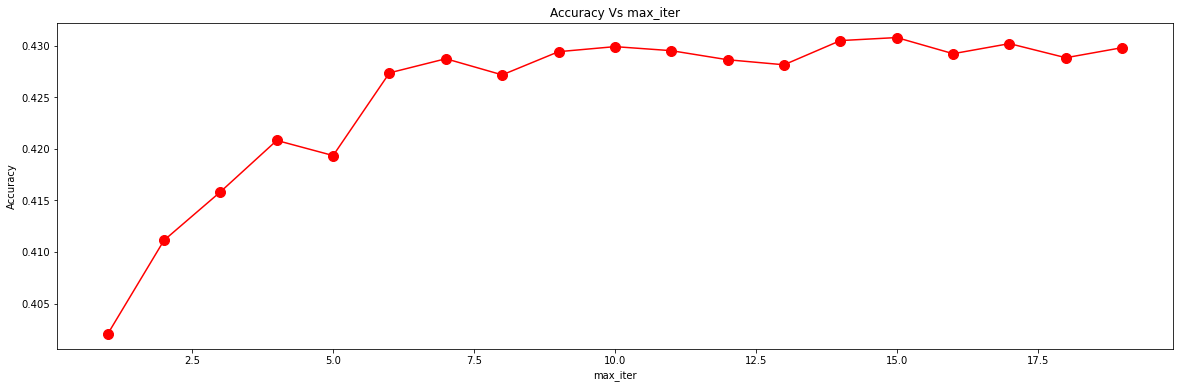

In [75]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 20), accuracy, color='red', marker='o',markersize=10)
plt.title('Accuracy Vs max_iter')
plt.xlabel('max_iter')
plt.ylabel('Accuracy')

这里做一个结论。

### \* Hyperparameters Study: penalty

Standing for penalty, String type, optional parameters are L1 and L2. It specifies the specification used in the penalty entry.

In [59]:
l1_accuracy = []
l2_accuracy = []

X_train, X_test, y_train, y_test = train_test_split(selected_df_data, df_target, test_size = 0.3)
for i in range(1, 20):
    log_reg_l1 = LogisticRegression(max_iter=400, penalty='l1',solver='saga')
    log_reg_l2 = LogisticRegression(max_iter=400, penalty='l2',solver='saga')
    
    log_reg_l1.fit(X_train, y_train)
    log_reg_l2.fit(X_train, y_train)
    
    pred_i_1 = log_reg_l1.predict(X_test)
    pred_i_2 = log_reg_l2.predict(X_test)
    
    
    l1_accuracy.append(metrics.accuracy_score(y_test, pred_i_1))
    l2_accuracy.append(metrics.accuracy_score(y_test, pred_i_2))

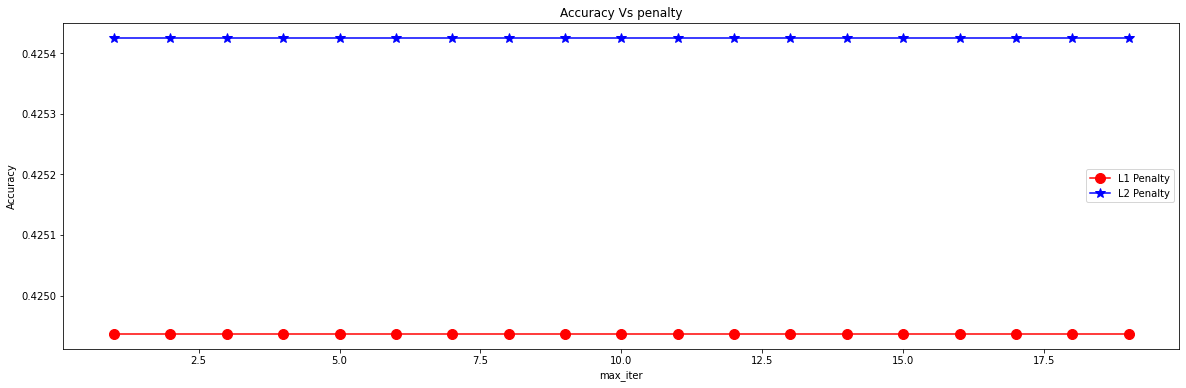

In [71]:
plt.figure(figsize=(20, 6))

plt.plot(range(1, 20), l1_accuracy, color='red', marker='o',markersize=10, label = 'L1 Penalty')
plt.plot(range(1, 20), l2_accuracy, color='blue', marker='*',markersize=10, label = 'L2 Penalty')

plt.legend() 

plt.title('Accuracy Vs penalty')
plt.xlabel('max_iter')
plt.ylabel('Accuracy')

plt.show()

这里做一个结论。

### \*Hyperparameters Study: solver

There are only five optional parameters in the optimization algorithm:
- **lbfgs**：second derivative matrix of loss function is used to iteratively optimize the loss function
- **newton-cg**：second derivative matrix of loss function is used to iteratively optimize the loss function
- **sag**：random average gradient descent, a variation of gradient descent method, which is different from ordinary gradient descent method in that only a part of samples are used to calculate gradient in each iteration.
- **saga**：stochastic optimization algorithms with linear convergence 

In [68]:
lbfgs_accuracy = []
newtown_cg_accuracy = []
sag_accuracy = []
saga_accuracy = []

X_train, X_test, y_train, y_test = train_test_split(selected_df_data, df_target, test_size = 0.3)
for i in range(1, 20):
    log_reg_l1 = LogisticRegression(max_iter=400, solver='lbfgs')
    log_reg_l2 = LogisticRegression(max_iter=400, solver='newton-cg')
    log_reg_l3 = LogisticRegression(max_iter=400, solver='sag')
    log_reg_l4 = LogisticRegression(max_iter=400, solver='saga')
    
    log_reg_l1.fit(X_train, y_train)
    log_reg_l2.fit(X_train, y_train)
    log_reg_l3.fit(X_train, y_train)
    log_reg_l4.fit(X_train, y_train)
    
    pred_i_1 = log_reg_l1.predict(X_test)
    pred_i_2 = log_reg_l2.predict(X_test)
    pred_i_3 = log_reg_l3.predict(X_test)
    pred_i_4 = log_reg_l4.predict(X_test)
    
    
    lbfgs_accuracy.append(metrics.accuracy_score(y_test, pred_i_1))
    newtown_cg_accuracy.append(metrics.accuracy_score(y_test, pred_i_2))
    sag_accuracy.append(metrics.accuracy_score(y_test, pred_i_3))
    saga_accuracy.append(metrics.accuracy_score(y_test, pred_i_4))

Text(0, 0.5, 'Accuracy')

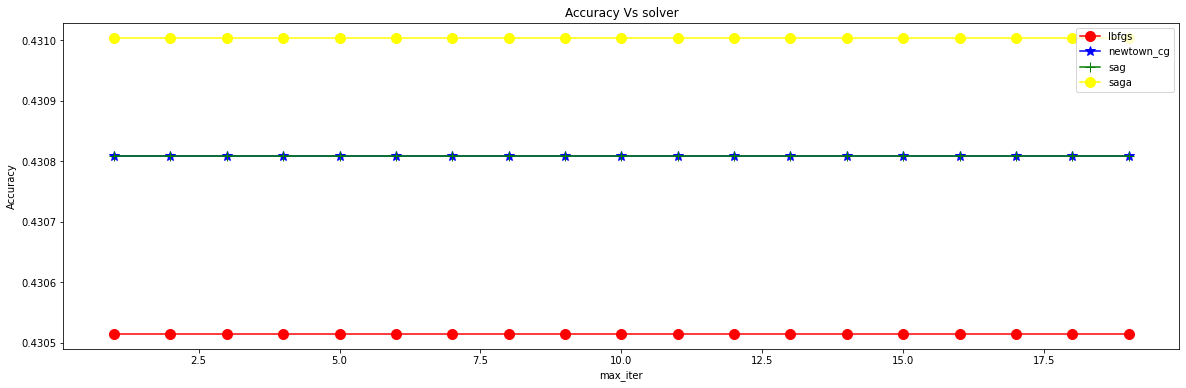

In [70]:
plt.figure(figsize=(20, 6))

plt.plot(range(1, 20), lbfgs_accuracy, color='red', marker='o',markersize=10, label = 'lbfgs')
plt.plot(range(1, 20), newtown_cg_accuracy, color='blue', marker='*',markersize=10, label = 'newtown_cg')
plt.plot(range(1, 20), sag_accuracy, color='green', marker='+',markersize=10, label = 'sag')
plt.plot(range(1, 20), saga_accuracy, color='yellow', marker='o',markersize=10, label = 'saga')

plt.legend()


plt.title('Accuracy Vs solver')
plt.xlabel('max_iter')
plt.ylabel('Accuracy')

这里做一个结论。

### \*Hyperparameters Study: multi_class

the parameter of classification method, string type. The optional parameters are *ovr* and *multinomial*, and the default is *ovr*. The difference is mainly in multiple logistic regression.

In [72]:
accuracy_ovr = []
accuracy_mvm = []

for i in range(1, 20):
    log_reg_ovr = LogisticRegression(max_iter=i*20, multi_class='ovr')
    log_reg_mvm = LogisticRegression(max_iter=i*20, multi_class='multinomial')
    
    log_reg_ovr.fit(X_train, y_train)
    log_reg_mvm.fit(X_train, y_train)
    
    
    pred_i_ovr = log_reg_ovr.predict(X_test)
    pred_i_mvm = log_reg_mvm.predict(X_test)

    accuracy_ovr.append(metrics.accuracy_score(y_test, pred_i_ovr))
    accuracy_mvm.append(metrics.accuracy_score(y_test, pred_i_mvm))

Text(0, 0.5, 'Accuracy')

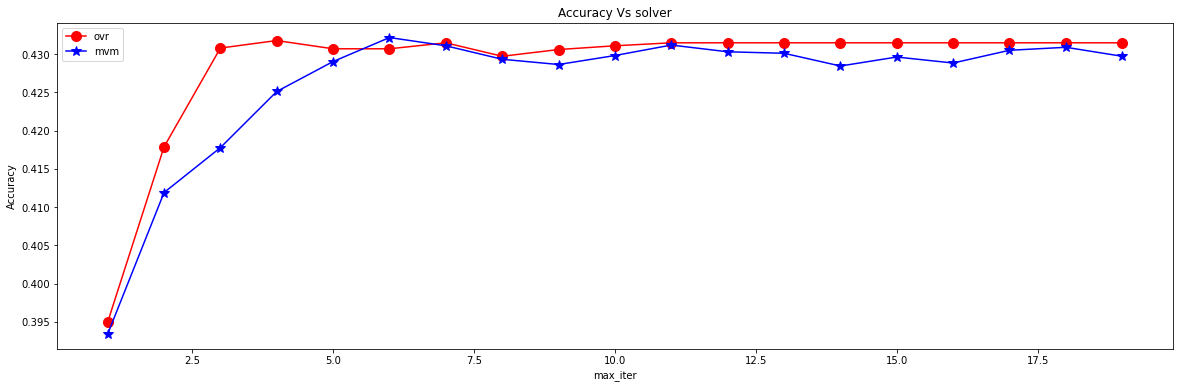

In [74]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 20), accuracy_ovr, color='red', marker='o',markersize=10, label = 'ovr')
plt.plot(range(1, 20), accuracy_mvm, color='blue', marker='*',markersize=10, label='mvm')

plt.legend()

plt.title('Accuracy Vs solver')
plt.xlabel('max_iter')
plt.ylabel('Accuracy')

这里做一个结论。

### \* Hyperparameters Selection

这里做一个解释！ 

In [76]:
parameters = {'solver':['newton-cg', 'lbfgs', 'sag', 'saga'] ,
              'multi_class':['ovr', 'mvm']
             }
log_reg = LogisticRegression(max_iter=400)
gridSearch = GridSearchCV(log_reg, parameters)
X_train, X_test, y_train, y_test = train_test_split(selected_df_data, df_target, test_size = 0.3)
gridSearch.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=400),
             param_grid={'multi_class': ['ovr', 'mvm'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [79]:
print(gridSearch.best_score_)
print(gridSearch.best_params_)

0.4234966439434773
{'multi_class': 'ovr', 'solver': 'saga'}
LogisticRegression(max_iter=400, multi_class='ovr', solver='saga')


## Single Classifer: Naive Bayes Classifer

解释一下什么是朴素贝叶斯分类器 

### Naive Bayes Classifer: Gaussian

解释一下什么是高斯朴素贝叶斯分类器

#### 1. Train Test Split 

In [80]:
X_train, X_test, y_train, y_test = train_test_split(selected_df_data, df_target, test_size = 0.3)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)

In [81]:
print(classification_report(y_pred=pred, y_true=y_test))
print(accuracy_score(y_pred=pred, y_true=y_test)) 

              precision    recall  f1-score   support

           0       0.40      0.82      0.53      3398
           1       0.50      0.26      0.34      3349
           2       0.41      0.18      0.25      3471

    accuracy                           0.42     10218
   macro avg       0.44      0.42      0.37     10218
weighted avg       0.44      0.42      0.37     10218

0.4162262673713055


#### 2.Standard Cross Validation

In [82]:
gnb = GaussianNB()
accuracy= cross_val_score(gnb, selected_df_data, df_target,scoring='accuracy', cv=5)
print("5 Fold Accuracy:",accuracy.mean())

5 Fold Accuracy: 0.40011743981209624


#### 3. Shuffle-Split Cross-Validation

In [84]:
shufspl = ShuffleSplit(train_size=.5,test_size=.4,n_splits=8) 
scores = cross_val_score(gnb, selected_df_data,df_target,cv=shufspl)
print("Mean score of shuffle split cross validation:{:.2f}".format(scores.mean()))

Mean score of shuffle split cross validation:0.41


#### 4. Analysis of Train/Test/Split Methods

这里做一个分析

### Naive Bayes Classifer: BernoulliNB

解释一下什么是伯努利朴素贝叶斯分类器

#### 1. Train Test Split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(selected_df_data, df_target, test_size = 0.3)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
pred = bnb.predict(X_test)

In [86]:
print(classification_report(y_pred=pred, y_true=y_test))
print(accuracy_score(y_pred=pred, y_true=y_test)) 

              precision    recall  f1-score   support

           0       0.42      0.68      0.52      3319
           1       0.41      0.45      0.43      3389
           2       0.38      0.12      0.18      3510

    accuracy                           0.41     10218
   macro avg       0.40      0.42      0.38     10218
weighted avg       0.40      0.41      0.37     10218

0.41211587394793503


#### 2. Standard Cross Validation

In [87]:
bnb = BernoulliNB()
accuracy= cross_val_score(bnb, selected_df_data, df_target,scoring='accuracy', cv=5)
print("5 Fold Accuracy:",accuracy.mean())

5 Fold Accuracy: 0.4090722254844392


#### 3. Shuffle-Split Cross-Validation

In [88]:
shufspl = ShuffleSplit(train_size=.5,test_size=.4,n_splits=8) 
scores = cross_val_score(bnb, selected_df_data,df_target,cv=shufspl)
print("Mean score of shuffle split cross validation:{:.2f}".format(scores.mean()))

Mean score of shuffle split cross validation:0.42


#### 4. Analysis of Train/Test/Split Methods

### Multinomial Naive Bayes

解释一下什么是多项式朴素贝叶斯分类器

#### 1. Train Test Split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(selected_df_data, df_target, test_size = 0.3)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred = mnb.predict(X_test)

In [90]:
print(classification_report(y_pred=pred, y_true=y_test))
print(accuracy_score(y_pred=pred, y_true=y_test)) 

              precision    recall  f1-score   support

           0       0.45      0.08      0.13      3223
           1       0.39      0.33      0.36      3443
           2       0.36      0.69      0.48      3552

    accuracy                           0.38     10218
   macro avg       0.40      0.37      0.32     10218
weighted avg       0.40      0.38      0.33     10218

0.37629673125856333


#### 2. Standard Cross Validation

In [91]:
mnb = MultinomialNB()
accuracy= cross_val_score(mnb, selected_df_data, df_target,scoring='accuracy', cv=5)
print("5 Fold Accuracy:",accuracy.mean())

5 Fold Accuracy: 0.3678802113916618


#### 3. Shuffle-Split Cross-Validation

In [92]:
shufspl = ShuffleSplit(train_size=.5,test_size=.4,n_splits=8) 
scores = cross_val_score(mnb, selected_df_data,df_target,cv=shufspl)
print("Mean score of shuffle split cross validation:{:.2f}".format(scores.mean()))

Mean score of shuffle split cross validation:0.37


## Single Classifer: KNN Classifer

### 1. Train Test Split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(selected_df_data, df_target, test_size = 0.3)
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)
pred = knc.predict(X_test)

In [94]:
print(classification_report(y_pred=pred, y_true=y_test))
print(accuracy_score(y_pred=pred, y_true=y_test)) 

              precision    recall  f1-score   support

           0       0.38      0.53      0.45      3259
           1       0.41      0.37      0.39      3497
           2       0.38      0.27      0.31      3462

    accuracy                           0.39     10218
   macro avg       0.39      0.39      0.38     10218
weighted avg       0.39      0.39      0.38     10218

0.38833431199843416


### 2. Standard Cross Validation

In [95]:
knc = KNeighborsClassifier(n_neighbors=5)
accuracy= cross_val_score(knc, selected_df_data, df_target,scoring='accuracy', cv=5)
print("5 Fold Accuracy:",accuracy.mean())

5 Fold Accuracy: 0.37040516735173223


### 3. Shuffle-Split Cross-Validation

In [96]:
shufspl = ShuffleSplit(train_size=.5,test_size=.4,n_splits=8) 
scores = cross_val_score(knc, selected_df_data,df_target,cv=shufspl)
print("Mean score of shuffle split cross validation:{:.2f}".format(scores.mean()))

Mean score of shuffle split cross validation:0.39


### 4. Analysis of Train Test Split

添加自己的分析！

### \*Hyperparameters Study: n_neighbours

In [97]:
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(selected_df_data, df_target, test_size = 0.3)
for i in range(3, 500, 5):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(X_train, y_train)
    pred_i = knc.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Accuracy')

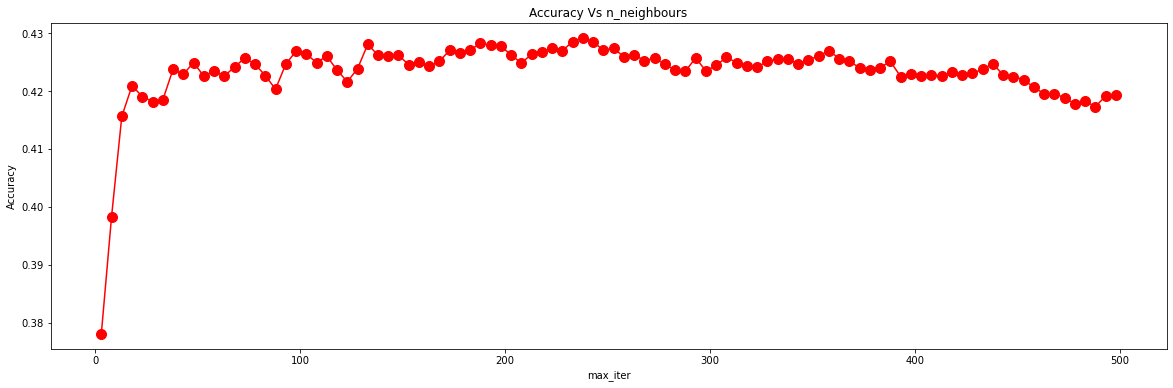

In [98]:
plt.figure(figsize=(20, 6))

plt.plot(range(3, 500, 5), accuracy, color='red', marker='o',markersize=10)
plt.title('Accuracy Vs n_neighbours')
plt.xlabel('n_neighbours')
plt.ylabel('Accuracy')

### \* Hyperparameters Study: algorithm

In [99]:
accuracy = {}
X_train, X_test, y_train, y_test = train_test_split(selected_df_data, df_target, test_size = 0.3)

auto_knc = KNeighborsClassifier(n_neighbors=150, algorithm='auto')
auto_knc.fit(X_train, y_train)
pred_i = auto_knc.predict(X_test)
accuracy['auto'] = metrics.accuracy_score(y_test, pred_i)

ball_tree_knc = KNeighborsClassifier(n_neighbors=150, algorithm='ball_tree')
ball_tree_knc.fit(X_train, y_train)
pred_i = ball_tree_knc.predict(X_test)
accuracy['ball_tree'] = metrics.accuracy_score(y_test, pred_i)

kd_tree_knc = KNeighborsClassifier(n_neighbors=150, algorithm='kd_tree')
kd_tree_knc.fit(X_train, y_train)
pred_i = kd_tree_knc.predict(X_test)
accuracy['kd_tree'] = metrics.accuracy_score(y_test, pred_i)


In [100]:
print(accuracy)

{'auto': 0.4265022509297318, 'ball_tree': 0.4265022509297318, 'kd_tree': 0.4265022509297318}


### \* Hyperparameters Study:  p

In [102]:
accuracy = []

for i in range(2, 10):
    knc = KNeighborsClassifier(p = i)
    knc.fit(X_train, y_train)
    pred_i = knc.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Accuracy')

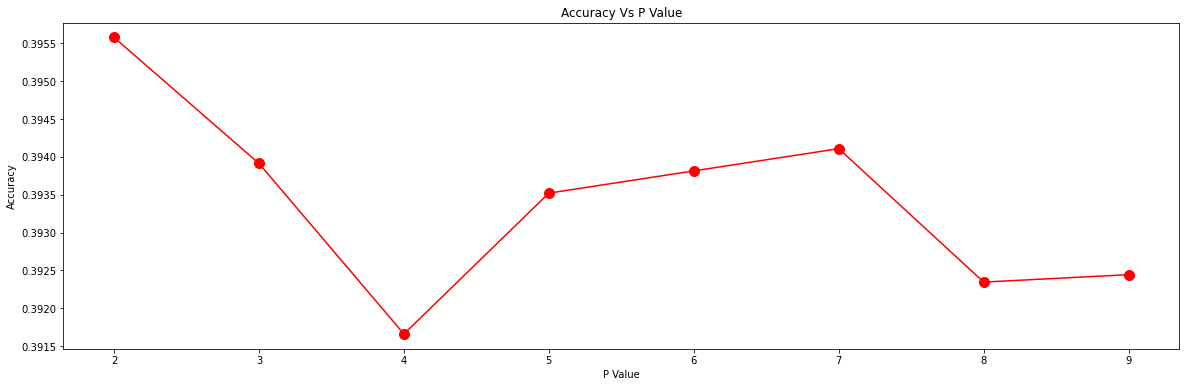

In [103]:
plt.figure(figsize=(20, 6))
plt.plot(range(2, 10), accuracy, color='red', marker='o',markersize=10)
plt.title('Accuracy Vs P Value')
plt.xlabel('P Value')
plt.ylabel('Accuracy')

### \* Hyperparamters Selection

In [ ]:
parameters = {'n_neighbors':[x for x in range(3, 500, 15)] ,
              'algorithm':['auto', 'ball_tree','kd_tree'],
              'p': [x for x in range(2,10)]
             }
knc = KNeighborsClassifier()
gridSearch = GridSearchCV(knc, parameters)
X_train, X_test, y_train, y_test = train_test_split(selected_df_data, df_target, test_size = 0.3)
gridSearch.fit(X_train, y_train)

In [ ]:
print(gridSearch.best_score_)
print(gridSearch.best_params_)

## Single Classifer: Decision Tree

In [ ]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)

In [ ]:
pred = dtc.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))

#### Parameters Study: criterion

In [ ]:
dtc_gini = DecisionTreeClassifier(criterion="gini")
dtc_gini = dtc_gini.fit(X_train,y_train)
pred = dtc_gini.predict(X_test)
gini_accuracy = metrics.accuracy_score(y_test, pred)

print('Gini Criterion')
print(gini_accuracy)

In [ ]:
dtc_entropy = DecisionTreeClassifier(criterion="entropy")
dtc_entropy = dtc_entropy.fit(X_train,y_train)
pred = dtc_entropy.predict(X_test)
entropy_accuracy = metrics.accuracy_score(y_test, pred)

print('Entropy Criterion')
print(entropy_accuracy)

In [ ]:
name_list = ['Gini','Entropy']
num_list = [gini_accuracy, entropy_accuracy]
plt.bar(range(len(num_list)), num_list,color='rgb',tick_label=name_list)
plt.show()

### Single Classsifer:  SVM

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train,y_train) 

In [ ]:
pred = svc_clf.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))

#### Parameters Study: C

In [ ]:
accuracy = []

for i in range(1, 5):
    svc_clf = SVC(C= i)
    svc_clf.fit(X_train, y_train)
    pred_i = svc_clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_i))

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(3, 2, 1)
plt.plot(range(1, 5), accuracy, color='red', marker='o',markersize=10)
plt.title('Accuracy Vs max_iter')
plt.xlabel('max_iter')
plt.ylabel('Accuracy')

#### Parameters Study: kernel 

In [ ]:
accuracy = {}

svc_clf_linear = SVC(kernel= 'linear')
svc_clf_linear.fit(X_train, y_train)
pred_i = svc_clf_linear.predict(X_test)
accuracy['linear'] = metrics.accuracy_score(y_test, pred_i)

svc_clf_poly = SVC(kernel= 'poly')
svc_clf_poly.fit(X_train, y_train)
pred_i = svc_clf_poly.predict(X_test)
accuracy['poly'] = metrics.accuracy_score(y_test, pred_i)
    
svc_clf_rbf = SVC(kernel= 'rbf')
svc_clf_rbf.fit(X_train, y_train)
pred_i = svc_clf_rbf.predict(X_test)
accuracy['rbf'] = metrics.accuracy_score(y_test, pred_i)


svc_clf_sigmod = SVC(kernel= 'sigmoid')
svc_clf_sigmod.fit(X_train, y_train)
pred_i = svc_clf_sigmod.predict(X_test)
accuracy['sigmoid'] = metrics.accuracy_score(y_test, pred_i)

In [ ]:
print(accuracy)

### Single Classifer Conclusion

hello 需要做一个总结

### Ensemble Classifer: Bagging

In [ ]:
base_log_reg = LogisticRegression(max_iter=1000)
bag_clf = BaggingClassifier(base_estimator=base_log_reg, n_estimators=10)

bag_clf.fit(X_train, y_train)

In [ ]:
pred = bag_clf.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test))

### Ensemble Classifer: Boosting

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=200)
gb_clf.fit(X_train, y_train)

In [ ]:
pred = gb_clf.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test))

### Ensemble Classifer: Voting

In [ ]:
tree_clf = DecisionTreeClassifier()
log_reg_clf = LogisticRegression(max_iter=1000)
randf_clf = RandomForestClassifier()

voting_clf = VotingClassifier([('decTree', tree_clf), ('LogReg', log_reg_clf), ('RandForest', randf_clf)], weights=None)
voting_clf.fit(X_train, y_train)

In [ ]:
pred = voting_clf.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test))

### Ensemble Classifer: Random Forest

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=2)
rf_clf.fit(X_train, y_train)

In [ ]:
pred = rf_clf.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test))

## Testing

# Evaluation

# Reflect

## Feature Selection By 